# Instructions

This assessment concerns the well-known tips dataset and the Python packages seaborn and jupyter. The project is broken into three parts, as follows:

1. **Description**: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset.

2. **Regression**: To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

3. **Analyse**: Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

In [1]:
# Show plots in notebook.
%matplotlib inline

In [2]:
# Import packages.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the color palette.
sns.set_palette("Set2")

# Part 1. Description

In this assessment, I work with the tips dataset which is inbuild in a seaborn package. The data is this dataset were recorded in a restaurant in US by a food server on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and offered to seat in a non-smoking section to patrons who requested it.

Let's load the tips dataset and see the summary statistic of the dataset.

In [3]:
# Load the tips dataset which is part of the seaborn package.
tips = sns.load_dataset("tips")

In [4]:
# Show the tips dataset.
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


We can see that tips dataset has 244 rows and 7 columns:

* total_bill- cost of the meal including tax, in US dollars
* tip- gratuity in US dollars
* sex- sex of person paying for the meal (male or female)
* smoker- smoker in party (no or yes)
* day- day of the week (Thursday, Friday, Saturday, Sunday)
* time- night or day (dinner or lunch)
* size- size of the party (from 1 to 6)

We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.

In [5]:
# Returns the number of Males and Females.
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

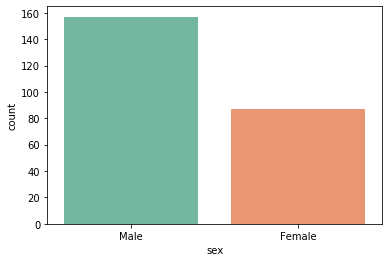

In [6]:
# Create the plot of variable sex.
sns.countplot(tips.sex, data = tips)

In [7]:
# Returns the number of parties with Non smokers and Smokers.
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

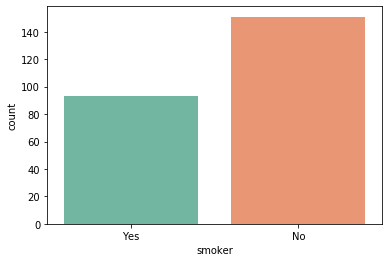

In [8]:
# Create the plot of variable smoker.
sns.countplot(tips.smoker, data = tips)

In [9]:
# Returns the number of parties during Dinner time and Lunch time.
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

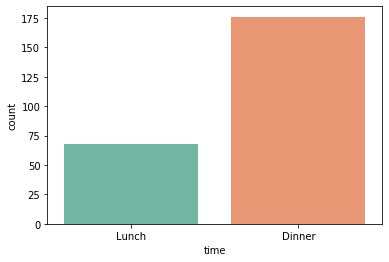

In [10]:
# Create the plot of variable time.
sns.countplot(tips.time, data = tips)

In [11]:
# Returns the number of parties on different days.
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

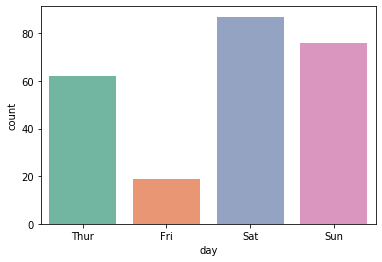

In [12]:
# Create the plot of variable day.
sns.countplot(tips.day, data = tips)

In [13]:
# Returns the size of the party and number of parties.
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

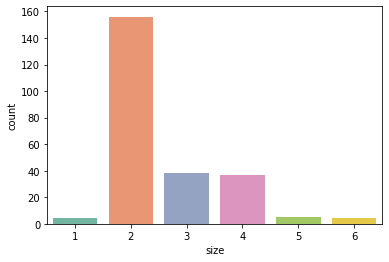

In [14]:
# Create the plot of variable size.
sns.countplot(tips['size'], data = tips)

In [15]:
# Returns the sum of total_bill.
tips.total_bill.sum()

4827.77

In [16]:
# Returns the sum of tips.
tips.tip.sum()

731.5799999999999

In [17]:
# Returns the sum of party size.
tips.size.sum()

1708

In the dataset, there is:
* 157 Males and 87 Females paying for the bill.
* 151 parties with non smokers and 93 with smokers.
* 176 parties during Dinner time and 68 parties during Lunch time.
* 62 parties on Thursday, 19 on Friday, 87 on Saturday and 76 on Sunday.
* 4 parties of 1, 156 parties of 2, 38 parties of 3, 37 parties of 4, 5 parties of 5 and 4 parties of 6. 
* Visitors paid 4827.77 in total bills.
* Visitors paid 731. 58 in tips.
* 1708 people visited the restaurant.

In [18]:
# Returns summary statistics of the dataset.
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We have 244 values in each numerical column, so no values are missing. 
* The minimum value of total_bill is 3.07, the average value is 19.79 and the maximum value is 50.81. The standard deviation is 8.90 so the values are not close to the mean but are spread out over a wider range.  
* The minimum value of tip is 1, the average value is 3 and the maximum value is 10. The standard deviation is 1.38 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.57 and the maximum value is 6. The standard deviation is 0.95 so the values are close to mean.

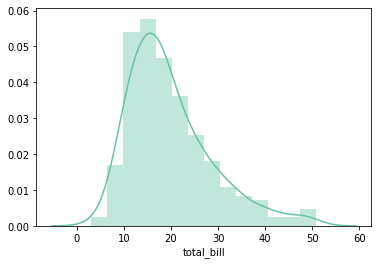

In [19]:
# Returns a plot of total_bill.
sns.distplot(tips.total_bill)

From the image above we can see that most of the total_bill paid by the customers are around 20.

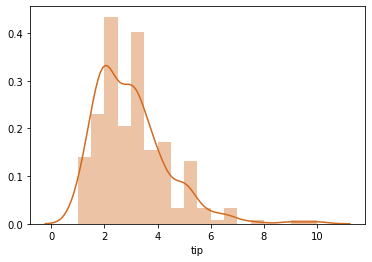

In [20]:
# Returns a plot of tip.
sns.distplot(tips.tip, color = "chocolate")

From the image above we can see that most of the tips given by the customers are in the range of 2-4.

In [21]:
# Returns summary statistics of the dataset only for Females.
(tips.loc[tips.loc[:, 'sex'] == 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


We have 87 values in each numerical column for the value Female in the column sex.

* The minimum value of total_bill is 3.07, the average value is 18.06 and the maximum value is 44.3. The standard deviation is 8 so the values are not close to the mean but are spread out over a wider range.
* The minimum value of tip is 1, the average value is 2.83 and the maximum value is 6.5. The standard deviation is 1.16 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.46 and the maximum value is 6. The standard deviation is 0.94 so the values are close to mean.

In [22]:
# Returns summary statistics of the dataset only for Males.
(tips.loc[tips.loc[:, 'sex'] == 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


We have 157 values in each numerical column for the value Male in the column sex.

* The minimum value of total_bill is 7.25, the average value is 20.74 and the maximum value is 50.81. The standard deviation is 9.25 so the values are not close to the mean but are spread out over a wider range.
* The minimum value of tip is 1, the average value is 3.09 and the maximum value is 10. The standard deviation is 1.49 so the values are close to mean.
* The minimum value of size is 1, the average value is 2.63 and the maximum value is 6. The standard deviation is 0.96 so the values are close to mean.

In [23]:
# Returns numbers of entries in each column divided by sex, smoker, day and time. 
tips.groupby(['sex', 'smoker', 'day', 'time']).size()

sex     smoker  day   time  
Male    Yes     Thur  Lunch     10
                Fri   Lunch      3
                      Dinner     5
                Sat   Dinner    27
                Sun   Dinner    15
        No      Thur  Lunch     20
                Fri   Dinner     2
                Sat   Dinner    32
                Sun   Dinner    43
Female  Yes     Thur  Lunch      7
                Fri   Lunch      3
                      Dinner     4
                Sat   Dinner    15
                Sun   Dinner     4
        No      Thur  Lunch     24
                      Dinner     1
                Fri   Lunch      1
                      Dinner     1
                Sat   Dinner    13
                Sun   Dinner    14
dtype: int64

Males in party with Smokers were the most often paying on Saturday during the Dinner time and in party with No smokers on Sunday during the Dinner time. Females in party with Smokers were the most often paying on Saturday during the Dinner time and in party with No smokers on Thursday during the Lunch time.

# Part 2. Regression

**Linear Regression** is one of the most fundamental and widely used Machine Learning Algorithms. 

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. 

Linear relationships can either be positive or negative. **A positive relationship** between two variables basically means that an increase in the value of one variable also implies an increase in the value of the other variable. **A negative relationship** between two variables means that an increase in the value of one variable implies a decrease in the value of the other variable.

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset.

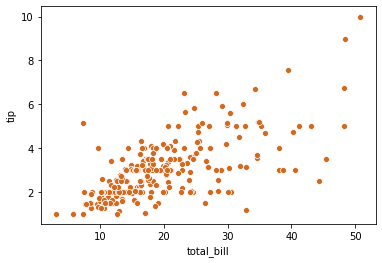

In [24]:
# Create the scatterplot.
sns.scatterplot(x = "total_bill", y = "tip", data = tips, color = "chocolate")

Lineplot shows the relationship between two variables connected with lines to emphasize continuity.

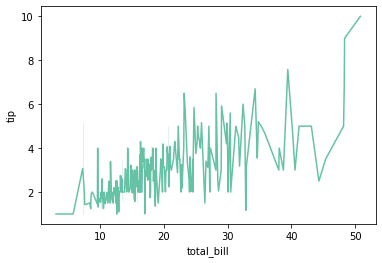

In [25]:
# Create the lineplot.
sns.lineplot(x = "total_bill", y = "tip", data = tips)

Regplot shows a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

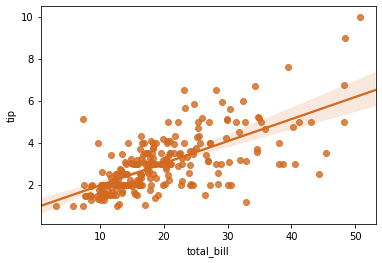

In [26]:
# Create the regplot.
sns.regplot(x = "total_bill", y = "tip", data = tips, color = "chocolate")

Lmplot combines regplot() and FacetGrid (multi-plot grid for plotting conditional relationships) to plot multiple linear relationships in a dataset.

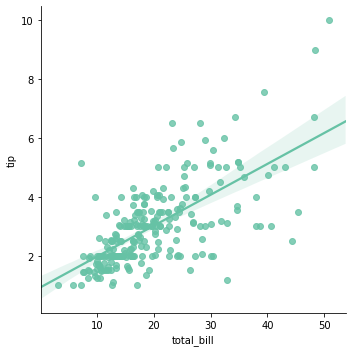

In [27]:
#Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", data = tips, )

Jointplot draws a plot of two variables with bivariate and univariate graphs. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. A univariate plot shows the data and summarizes its distribution.

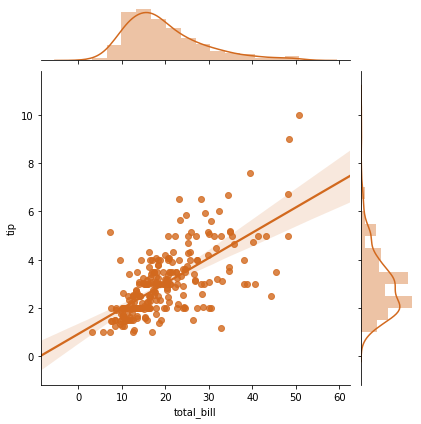

In [28]:
# Create the jointplot.
sns.jointplot(x ="total_bill", y = "tip", data = tips, kind = "reg", color = "chocolate")

**All the plots created above show a positive relationship between the total_bill and tip, because when the total_bill increases, the tip increases as well.**

The covariance and covariance matrix are widely used to characterize the relationships between two or more variables. Covariance is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

In [29]:
# Calculate the covariance matrix between total_bill and tips.
from numpy import cov
cov(tips.total_bill, tips.tip)

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

**The covariance between the total_bill and tip is 8.32. We can see that it is the positive value, suggesting the variables change in the same direction.**

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample.

In [30]:
# Calculate the Pearson correlation coefficient.
from scipy.stats import pearsonr
pearsonr(tips.total_bill, tips.tip)

(0.6757341092113643, 6.692470646864041e-34)

**The Pearson’s correlation coefficient is 0.68. The value is between 0 and 1, so the variables total_bill and tip are positively correlated. Also, the value is between 0.5 and 1 which suggests a high level of correlation.**

The Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. The scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively. Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. 

In [31]:
# Calculate the Spearman’s correlation coefficient.
from scipy.stats import spearmanr
spearmanr(tips.total_bill, tips.tip)

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

**Again, the Spearman’s correlation coefficient shows a strong correlation between the variables total_bill and tip of 0.68.**

# Part 3. Analyse

In this section, I analyse the relationship between the variables within the dataset. At the beginning, I focus mostly on the relationship between the variable size (of the party) and the variables total_bill and tip. I start with one of the simplest ways to visualize the relation between all features, the pairplot method which plots all the pair relationships in the dataset at once. 

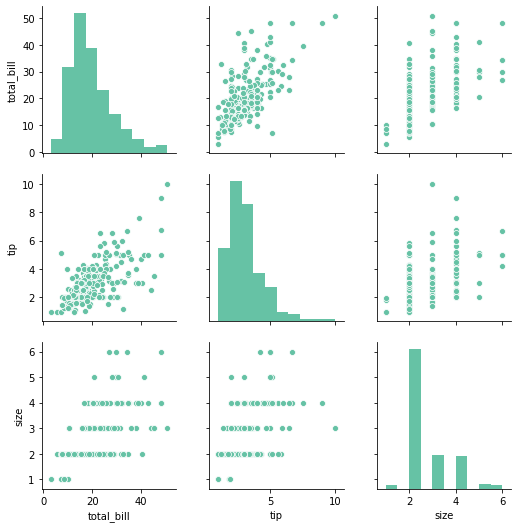

In [32]:
# Create the pairplot.
sns.pairplot(tips)

The pairplot plots all variables against each other. By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

We can also plot a subset of variables from our dataset, I decided to plot total_bill and size, we can also use different colors for the variable sex in our pairplot. It looks like the Females are usually paying lower total_bills and also paying for a smaller size of the party.

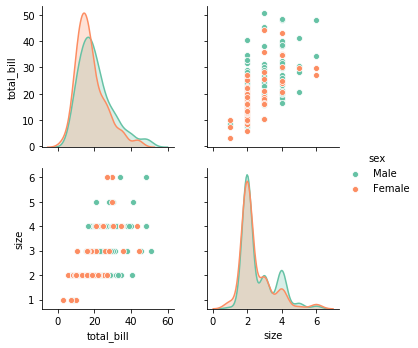

In [33]:
# Create the pairplot of subset of variables.
sns.pairplot(tips, vars=["total_bill", "size"], hue = "sex")

**It looks like there is a positive relationship between the size of the party and both total_bill and tip.** 

I will try to confirm this by creating a different plots of the selected variables. 

Another plot I use in this assessment is the Kdeplot, it fits and plots a univariate or bivariate kernel density estimate.

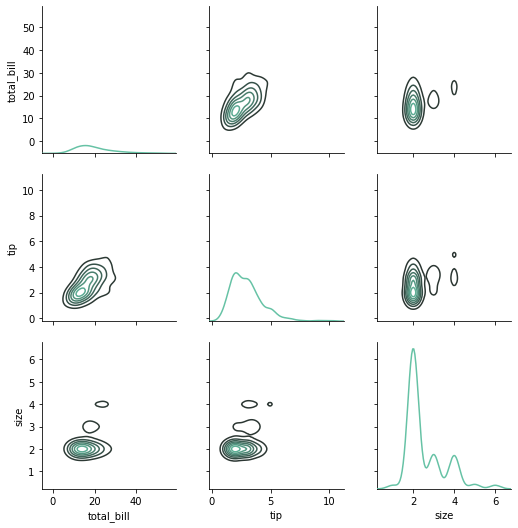

In [34]:
# Create the kdeplot.
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 7)

Again, it looks like there is a positive relationship between the size of the party and both total_bill and tip.

The next plot is the heatmap- it will plot rectangular data as a color-encoded matrix. The data values are visualised in the graph as colors. I decided to put correlation matrix into the heatmap. The correlation coefficient is visible in the center of each cell.

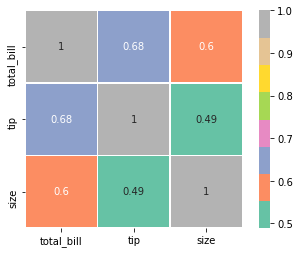

In [35]:
# Create the heatmap.
sns.heatmap(tips.corr(), linewidths = .5, square = True, cmap = "Set2", annot = True)

Based on the heatmap, there is a stronger correlation between the size and total_bill, and a medium correlation between the size and tip. I will check the results by calculating the covariance matrix, the Pearson correlation coefficient and the Spearman’s correlation coefficient.

In [36]:
# Calculate the covariance matrix.
result1 = cov(tips.total_bill, tips["size"])
result2 = cov(tips.tip, tips["size"])
print(f"The covariance matrix between the total_bill and size is \n{result1}")
print(f"The covariance matrix between the tip and size is \n{result2}")

The covariance matrix between the total_bill and size is 
[[79.25293861  5.06598344]
 [ 5.06598344  0.90459084]]
The covariance matrix between the tip and size is 
[[1.91445464 0.64390643]
 [0.64390643 0.90459084]]


The covariance between the total_bill and size is 5.06. The covariance between the tip and size is 0.64. We can see that they are the positive values, suggesting the variables change in the same direction.

In [37]:
# Calculate the Pearson's correlation coefficient.
result1, _ = pearsonr(tips.total_bill, tips["size"])
result2, _= pearsonr(tips.tip, tips["size"])
print(f"The Pearson’s correlation coefficient for variables total_bill and size is: %.3f" % result1)
print(f"The Pearson’s correlation coefficient for variables tip and size is: %.3f" % result2)

The Pearson’s correlation coefficient for variables total_bill and size is: 0.598
The Pearson’s correlation coefficient for variables tip and size is: 0.489


The Pearson’s correlation coefficients are between 0 and 1, so the variables are positively correlated. Also, the value of coefficient for total_bill and size suggests a high level of correlation. The value of coefficient for tip and size suggests a moderate correlation.

In [38]:
# Calculate the Spearman’s correlation coefficient.
result1, _ = spearmanr(tips.total_bill, tips["size"])
result2, _ = spearmanr(tips.tip, tips["size"])
print(f"The Spearman’s correlation coefficient for variables total_bill and size is: %.3f" % result1)
print(f"The Spearman’s correlation coefficient for variables tip and size is: %.3f" % result2)

The Spearman’s correlation coefficient for variables total_bill and size is: 0.605
The Spearman’s correlation coefficient for variables tip and size is: 0.468


The Spearman’s correlation coefficients are also between 0 and 1, so the variables are positively correlated. The value of coefficient for total_bill and size suggests a strong correlation. The value of coefficient for tip and size suggests a moderate correlation.

Boxplot- shows distributions with respect to categories. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

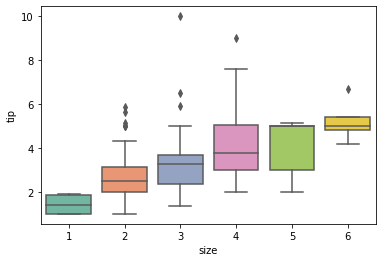

In [39]:
# Create the boxplot.
sns.boxplot(x = "size", y = "tip", data = tips)

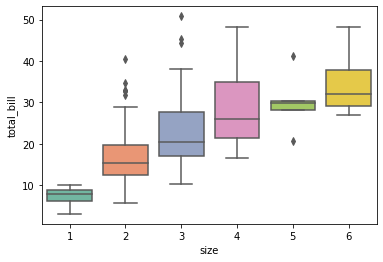

In [40]:
# Create the boxplot.
sns.boxplot(x = "size", y = "total_bill", data = tips)

In the boxplots above, we can see that when the size of the party rises, the tip and total_bill raises as well. We can also see some outliers:

* when comparing size of the party with tip, the size 2, size 3, size 4, size 6 have a couple of outliers present. See the size 3- the value of tip for that size was usually between 2 and 4, but we can see two outliers around 6 and one around 10.
* when comparing size of the party with total bill, the size 2, size 3 and the size 5 have a couple of outliers present. See the Size 5- the value of most of the total_bills for that size was between 25-30, but we see one otlier around 20 and another one around 40. 

The last couple of plots are showing the relationship between three variables. Two variables are always the same- total_bill and tip, and the third variable is changing- I start with size, which is followed by sex, smoker, time and day. I visualised the data using lmplot- this function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

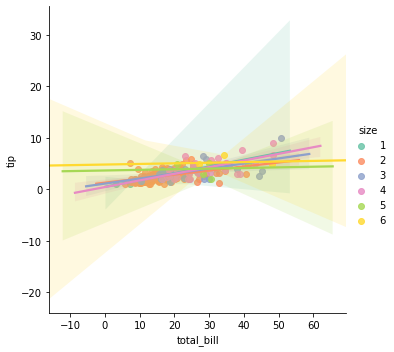

In [41]:
sns.lmplot(x = "total_bill", y = "tip", hue = "size", data = tips)

The first lmplot is too crowded and we can't see all values, so I decided to plot the levels of the third variable (size) across different columns. There was 4 parties of 1, 156 parties of 2, 38 parties of 3, 37 parties of 4, 5 parties of 5 and 4 parties of 6.

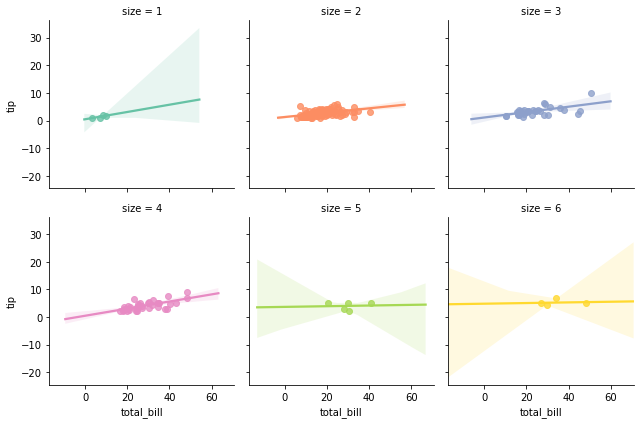

In [42]:
# Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", col = "size", hue = "size", col_wrap = 3, height = 3, data = tips)

In the plot above, we see that the bigger the size of the party, the bigger the total_bill and tip. 

In the next lmplot, our third variable is sex- Male or Female. In the tips dataset, we have 157 Males and 87 Females paying for the bill.

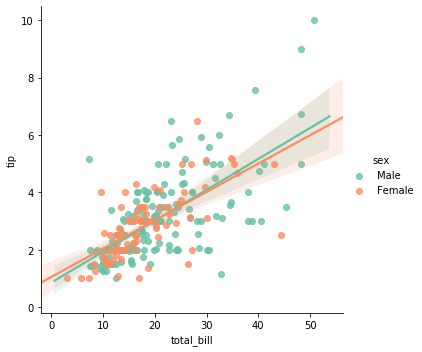

In [43]:
#Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", hue = "sex", data = tips)

It looks like Males are paying higher total_bills than Females. We also know that Females are paying for a smaller size of a party than Males, as mentioned in the pairplot earlier in the assessment.

In the next lmplot, the third variable is smoker. In the dataset, there is 151 parties with non smokers and 93 with smokers.

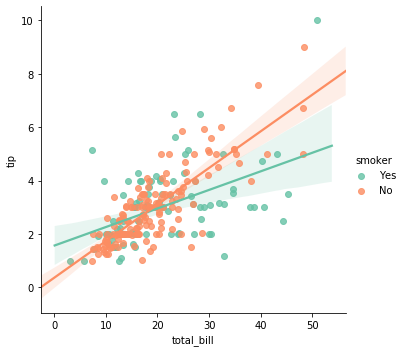

In [44]:
# Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips)

It looks like the parties without the smokers are paying higher total_bills and especially higher tips than the parties with the smokers.

In the next visualisation of the relationship between three variables, the third variable is time- Lunch or Dinner. There was 176 parties during Dinner time and 68 parties during Lunch time in the dataset.

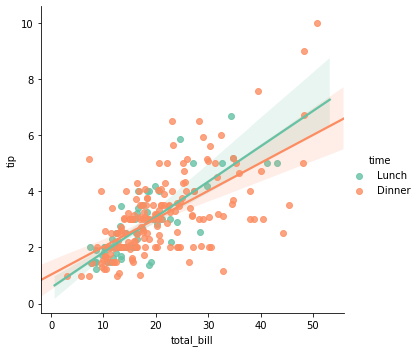

In [45]:
# Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", hue = "time", data = tips)

Based on the plot above, it looks like they are higher bills and tips during the Lunch time than during the Dinner time. 

The last lmplot has the third variable day- it could be either Thursday, Friday, Saturday or Sunday. In the dataset, there was 62 parties on Thursday, 19 on Friday, 87 on Saturday and 76 on Sunday.

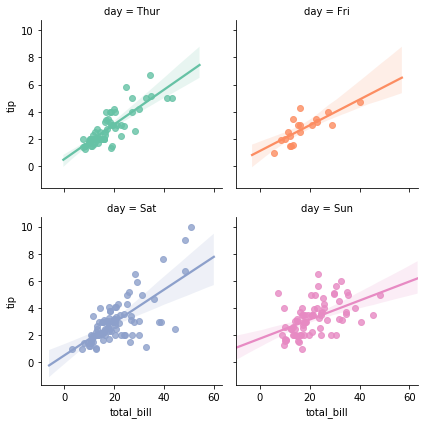

In [46]:
# Create the lmplot.
sns.lmplot(x = "total_bill", y = "tip", col = "day", hue = "day", col_wrap = 2, height = 3, data = tips)

There is usually the lowest total_bills and tips on Fridays, and the highest total_bills and tips are on Saturdays.

# References


[Seaborn- An Introduction to seaborn](https://seaborn.pydata.org/introduction.html)

[Towards Data Science- Analyze the data through data visualization using Seaborn](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)

[Kaggle- Seaborn tips dataset](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)

[Video: Descriptive statistics and plots with pandas](https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81)

[Video: Different plots in Python](https://web.microsoftstream.com/video/99500835-4d08-428d-ad17-3cbc62a13550)

[Stack Overflow- Difference between groupby and value_counts ](https://stackoverflow.com/a/47495765)

[Stack Overflow- df.groupby('a').size()explained](https://stackoverflow.com/a/38703649)

[Seborn- Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

[Analytics India Magazine- Introduction To Seaborn](https://analyticsindiamag.com/a-simple-introduction-to-pythons-seaborn-library/)

[Medium- Data Visualization with Python and Seaborn](https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130)

[Wikipedia- Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[Acadgild- Linear regression](https://acadgild.com/blog/linear-regression)

[Seaborn- Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

[Seaborn- Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

[Seaborn- Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

[Seaborn-Lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

[Seaborn- Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

[Seaborn- Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

[Seaborn- Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)

[Seaborn- Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

[Seaborn- Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)

[Machine Learning Mastery- How to Calculate Correlation Between Variables in Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)

[Seaborn- Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

[Seaborn- Kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

[Seaborn- Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Seabrn- Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

[Seaborn- Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)